In [166]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense,  Conv2D, MaxPooling2D, TimeDistributed, Flatten, InputLayer, Reshape, Conv1D, MaxPooling1D, Bidirectional, Dropout, ReLU
from tensorflow.keras.models import Sequential, load_model

from datetime import datetime
import math


In [167]:
regressands = [
    'Temp_IN'
]
past_hours = 23
next_hours = 1

In [168]:
# Prepare testX
# need df | day, month, year, hour, minute, temp_in, temp_in
# normilize
# then transform it to np

# one input data
# 0,0.0,0.0,0.0,0.043478,0.072202,0.072202
# 1,0.0,0.0,0.0,0.086957,0.066289,0.066289
# 2,0.0,0.0,0.0,0.130435,0.064159,0.064159
# 3,0.0,0.0,0.0,0.173913,0.061994,0.061994
# 4,0.0,0.0,0.0,0.217391,0.059685,0.059685
# 5,0.0,0.0,0.0,0.260870,0.108498,0.108498
# 6,0.0,0.0,0.0,0.304348,0.114032,0.114032
# 7,0.0,0.0,0.0,0.347826,0.126575,0.126575
# 8,0.0,0.0,0.0,0.391304,0.128928,0.128928
# 9,0.0,0.0,0.0,0.434783,0.095168,0.095168
# 10,0.0,0.0,0.0,0.478261,0.060939,0.060939
# 11,0.0,0.0,0.0,0.521739,0.060734,0.060734
# 12,0.0,0.0,0.0,0.565217,0.068019,0.068019
# 13,0.0,0.0,0.0,0.608696,0.074625,0.074625
# 14,0.0,0.0,0.0,0.652174,0.086410,0.086410
# 15,0.0,0.0,0.0,0.695652,0.084667,0.084667
# 16,0.0,0.0,0.0,0.739130,0.080095,0.080095
# 17,0.0,0.0,0.0,0.782609,0.106779,0.106779
# 18,0.0,0.0,0.0,0.826087,0.107742,0.107742
# 19,0.0,0.0,0.0,0.869565,0.106584,0.106584
# 20,0.000000,0.0,0.0,0.913043,0.144932,0.144932
# 21,0.000000,0.0,0.0,0.956522,0.138724,0.138724
# 22,0.000000,0.0,0.0,1.000000,0.137522,0.137522
# 23,0.033333,0.0,0.0,0.000000,0.095741,0.095741

In [169]:
f = open('sample.json')
sample_json = json.load(f)
data=[]
for item in sample_json['data']:
    # print(item)
    d = {'timestamp': item['time_stamp'], 'Temp_IN': item['value']}
    data.append(d)
print(data)

[{'timestamp': '2022-01-01 00:00:00', 'Temp_IN': 18.310977513229002}, {'timestamp': '2022-01-01 01:00:00', 'Temp_IN': 18.332358146811398}, {'timestamp': '2022-01-01 02:00:00', 'Temp_IN': 18.344347631993106}, {'timestamp': '2022-01-01 03:00:00', 'Temp_IN': 18.35153878532741}, {'timestamp': '2022-01-01 04:00:00', 'Temp_IN': 18.357649741329368}, {'timestamp': '2022-01-01 05:00:00', 'Temp_IN': 18.363555632811664}, {'timestamp': '2022-01-01 06:00:00', 'Temp_IN': 18.368718077672998}, {'timestamp': '2022-01-01 07:00:00', 'Temp_IN': 18.376636572869266}, {'timestamp': '2022-01-01 08:00:00', 'Temp_IN': 18.402579350463228}, {'timestamp': '2022-01-01 09:00:00', 'Temp_IN': 18.423353007566863}, {'timestamp': '2022-01-01 10:00:00', 'Temp_IN': 16.564161288504277}, {'timestamp': '2022-01-01 11:00:00', 'Temp_IN': 16.13886085423967}, {'timestamp': '2022-01-01 12:00:00', 'Temp_IN': 16.109840241789254}, {'timestamp': '2022-01-01 13:00:00', 'Temp_IN': 16.104072412111236}, {'timestamp': '2022-01-01 14:00:00'

In [170]:
df = pd.DataFrame(data[-25:])
df.head()

,timestamp,Temp_IN
0,2022-01-02 02:00:00,18.344811
1,2022-01-02 03:00:00,18.360131
2,2022-01-02 04:00:00,18.370914
3,2022-01-02 05:00:00,18.379597
4,2022-01-02 06:00:00,18.387572


In [171]:
ts = []
for item in df['timestamp']:
    # print(item)
    datetime_object = datetime.strptime(item, '%Y-%m-%d %H:%M:%S')
    ts.append(datetime_object)
# print(ts)

df['timestamp'] = pd.to_datetime(ts, format='%m/%d/%Y %H:%M:%S')


In [172]:

days = []
months = []
years = []
hours = []
minutes = []
for timestamp in df['timestamp']:
    days.append(timestamp.day)
    months.append(timestamp.month)
    years.append(timestamp.year)
    hours.append(timestamp.hour)
    minutes.append(timestamp.minute)

new_df = pd.DataFrame()
new_df['day'] = days
new_df['month'] = months
new_df['year'] = years
new_df['hour'] = hours
new_df['minute'] = minutes
new_df.index = df.index
new_df['Temp_IN'] = df['Temp_IN']
new_df.head()

,day,month,year,hour,minute,Temp_IN
0,2,1,2022,2,0,18.344811
1,2,1,2022,3,0,18.360131
2,2,1,2022,4,0,18.370914
3,2,1,2022,5,0,18.379597
4,2,1,2022,6,0,18.387572


In [173]:
X_test = new_df.astype('float32')
X_test.head()

,day,month,year,hour,minute,Temp_IN
0,2.0,1.0,2022.0,2.0,0.0,18.344810
1,2.0,1.0,2022.0,3.0,0.0,18.360132
2,2.0,1.0,2022.0,4.0,0.0,18.370914
3,2.0,1.0,2022.0,5.0,0.0,18.379597
4,2.0,1.0,2022.0,6.0,0.0,18.387571


In [175]:
minmax = pd.DataFrame()
minmax['day'] = [1,31]
minmax['month'] = [1,12]
minmax['year'] = [2018,2021]
minmax['hour'] = [0,23]
minmax['minute'] = [0,0]
minmax['Temp_IN'] = [14.412768,31.387367]
minmax.head()

,day,month,year,hour,minute,Temp_IN
0,1,1,2018,0,0,14.412768
1,31,12,2021,23,0,31.387367


In [176]:
normalized_X_test=(X_test-minmax.min())/(minmax.max()-minmax.min())

normalized_X_test.dropna(axis=1, inplace=True)

In [177]:
normalized_X_test.head()

,day,month,year,hour,Temp_IN
0,0.033333,0.0,1.333333,0.086957,0.231643
1,0.033333,0.0,1.333333,0.130435,0.232545
2,0.033333,0.0,1.333333,0.173913,0.233181
3,0.033333,0.0,1.333333,0.217391,0.233692
4,0.033333,0.0,1.333333,0.260870,0.234162


In [178]:
testX = []
for t in range(past_hours
        , len(normalized_X_test.index)-next_hours, next_hours):
    print(t)
    testX.append(normalized_X_test.values[t-past_hours
                                          :t, :])

testX = np.array(testX)

23


In [179]:
model = Sequential()
model.add(Reshape((past_hours
                   , normalized_X_test.shape[1], 1), input_shape=(past_hours
                                                                   , normalized_X_test.shape[1])))
model.add(Conv2D(filters=64, kernel_size=(2,1), strides=1, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,1), strides=(1,1)))
model.add(Conv2D(filters=64, kernel_size=(2,1), strides=1, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,1), strides=(1,1)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(64, activation='tanh'))
model.add(Dense(32))
model.add(Dense(next_hours * len(regressands)))
model.add(ReLU())
model.add(Reshape((next_hours, len(regressands))))


model.compile(loss='mse', optimizer='adam', metrics='mean_absolute_error')
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_10 (Reshape)        (None, 23, 5, 1)          0         
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 5, 64)         192       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 21, 5, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 5, 64)         8256      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 19, 5, 64)        0         
 g2D)                                                            
                                                                 
 time_distributed_5 (TimeDis  (None, 19, 320)         

1/1 [==============================] - 0s 16ms/step
17.912838304705442
[[17.912838]]
MAE (Temp_IN):  0.3628
RMSE (Temp_IN):  0.3628


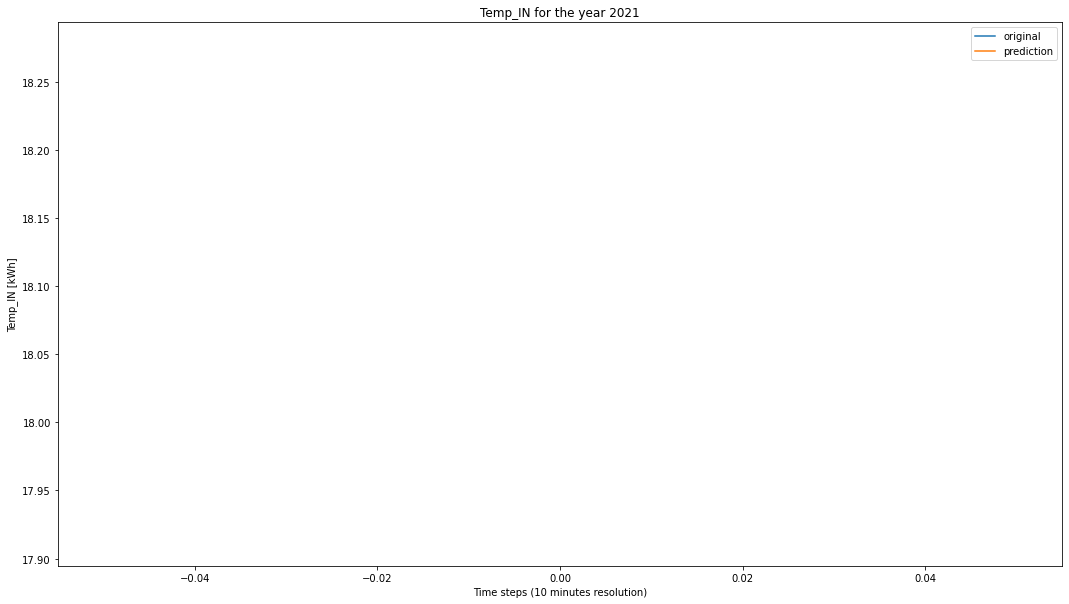

In [187]:
model.load_weights(f'Temp_IN/cnn_lstm.h5')
final_pred = {}

out = model.predict(testX)

# print(out.shape())
print(out[0,0,0] * (minmax['Temp_IN'].max() - minmax['Temp_IN'].min()) + minmax['Temp_IN'].min())

for i, reg in enumerate(regressands):
    temp = out[:, :, i] * (minmax['Temp_IN'].max() - minmax['Temp_IN'].min()) + minmax['Temp_IN'].min()
    print(temp)
    # temp = out[:, :, i] * y_train_std[i]
    final_pred[reg] = temp.reshape((testX.shape[0]*next_hours))
    err = (abs(X_test.values[past_hours
                             :past_hours
                              +len(final_pred[reg]), -len(regressands)+i]-final_pred[reg])).mean()
    rmse = math.sqrt(((X_test.values[past_hours
                                     :past_hours
                                      +len(final_pred[reg]), -len(regressands)+i]-final_pred[reg])**2).mean())
    print(f'MAE ({regressands[0].split(":")[0]}): ', round(err, 4))
    print(f'RMSE ({regressands[0].split(":")[0]}): ', round(rmse, 4))

    fig = plt.figure(figsize=(18,10))
    plt.title(reg)
    plt.plot(X_test.values[past_hours
                           :past_hours
                            +len(final_pred[reg]), 4+len(regressands)+i], label='original')
    plt.plot(final_pred[reg], label=f'prediction')
    plt.ylabel(f'Temp_IN [kWh]')
    plt.xlabel('Time steps (10 minutes resolution)')
    plt.title(f'Temp_IN for the year 2021')
    plt.legend()
    plt.show()

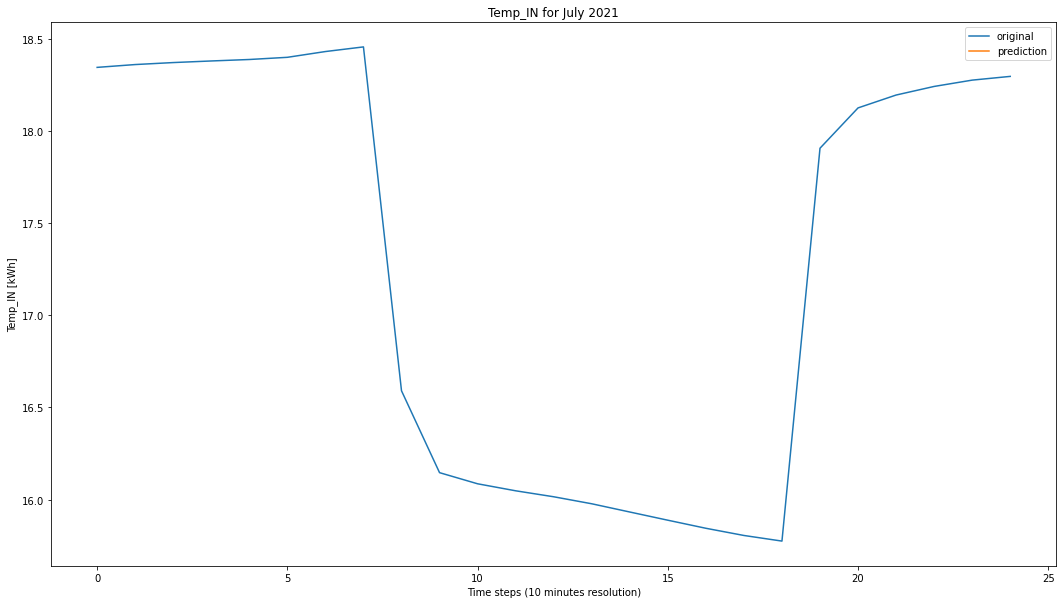

In [164]:
for i, reg in enumerate(regressands):
    fig = plt.figure(figsize=(18,10))
    plt.title(reg)
    plt.plot(X_test.values[:, 4+len(regressands)+i], label='original')
    plt.plot(final_pred[reg][:], label=f'prediction')
    plt.ylabel(f'Temp_IN [kWh]')
    plt.xlabel('Time steps (10 minutes resolution)')
    plt.title(f'Temp_IN for July 2021')
    plt.legend()
    plt.show()